In [1]:
pip install open3d numpy


Note: you may need to restart the kernel to use updated packages.


X 값 범위: -82.5185 ~ 151.4815


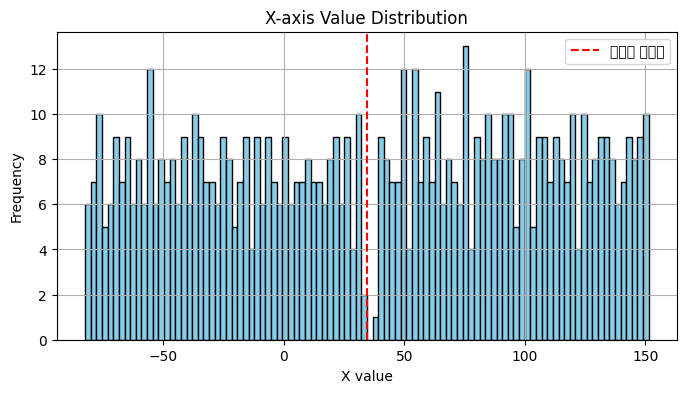

Plane 1 normal (빨강): [-0.09107002 -0.60651688  0.78983766]
Plane 2 normal (초록): [-0.11891979 -0.60817814  0.7848423 ]
두 평면 법선 벡터 사이의 각도: 1.623986 도


In [30]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# 1. xyz 파일 로드
xyz = np.loadtxt("flat2xyz.xyz")
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)

# 2. X축 값 추출
x_values = xyz[:, 0]

# 3. X값 범위 확인
x_min = np.min(x_values)
x_max = np.max(x_values)
print(f"X 값 범위: {x_min:.4f} ~ {x_max:.4f}")

# 4. 히스토그램 시각화
plt.figure(figsize=(8, 4))
plt.hist(x_values, bins=100, color='skyblue', edgecolor='black')
plt.axvline((x_min + x_max)/2, color='red', linestyle='--', label='중간값 기준선')
plt.xlabel("X value")
plt.ylabel("Frequency")
plt.title("X-axis Value Distribution")
plt.legend()
plt.grid(True)
plt.show()

# 5. 중간값 기준으로 두 평면 분리
threshold = (x_min + x_max) / 2
delta = 0.005

mask1 = x_values < (threshold - delta)
mask2 = x_values > (threshold + delta)

xyz1 = xyz[mask1]
xyz2 = xyz[mask2]

pcd1 = o3d.geometry.PointCloud()
pcd1.points = o3d.utility.Vector3dVector(xyz1)
pcd1.paint_uniform_color([1, 0, 0])  # 빨강

pcd2 = o3d.geometry.PointCloud()
pcd2.points = o3d.utility.Vector3dVector(xyz2)
pcd2.paint_uniform_color([0, 1, 0])  # 초록

# 6. 평면 추정 (RANSAC)
plane_model1, _ = pcd1.segment_plane(distance_threshold=0.002, ransac_n=3, num_iterations=1000)
plane_model2, _ = pcd2.segment_plane(distance_threshold=0.002, ransac_n=3, num_iterations=1000)

normal1 = np.array(plane_model1[:3])
normal2 = np.array(plane_model2[:3])

print(f"Plane 1 normal (빨강): {normal1}")
print(f"Plane 2 normal (초록): {normal2}")

# 7. 각도 계산
cos_theta = np.dot(normal1, normal2) / (np.linalg.norm(normal1) * np.linalg.norm(normal2))
angle_rad = np.arccos(np.clip(abs(cos_theta), -1.0, 1.0))  # 평행/역평행 모두 포함
angle_deg = np.degrees(angle_rad)

print(f"두 평면 법선 벡터 사이의 각도: {angle_deg:.6f} 도")

# 8. 시각화
o3d.visualization.draw_geometries([pcd1, pcd2])


X 값 범위: -67.2286 ~ 131.5214


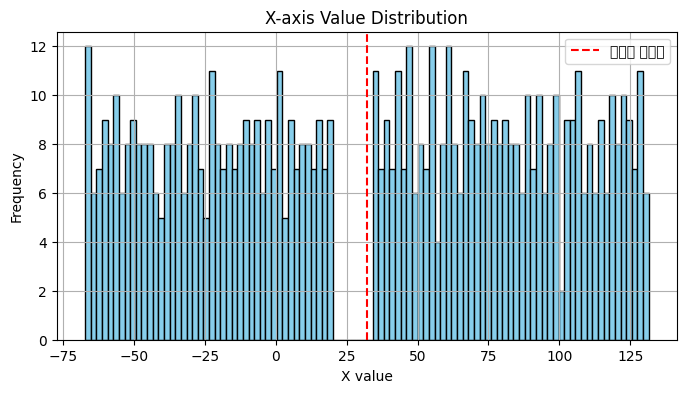

Plane 1 normal (빨강): [ 0.07792026 -0.62383757  0.77766003]
Plane 2 normal (초록): [-0.18891151 -0.59303808  0.78269935]
두 평면 법선 벡터 사이의 각도: 15.439220 도


In [31]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# 1. xyz 파일 로드
xyz = np.loadtxt("notflatxyz.xyz")
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)

# 2. X축 값 추출
x_values = xyz[:, 0]

# 3. X값 범위 확인
x_min = np.min(x_values)
x_max = np.max(x_values)
print(f"X 값 범위: {x_min:.4f} ~ {x_max:.4f}")

# 4. 히스토그램 시각화
plt.figure(figsize=(8, 4))
plt.hist(x_values, bins=100, color='skyblue', edgecolor='black')
plt.axvline((x_min + x_max)/2, color='red', linestyle='--', label='중간값 기준선')
plt.xlabel("X value")
plt.ylabel("Frequency")
plt.title("X-axis Value Distribution")
plt.legend()
plt.grid(True)
plt.show()

# 5. 중간값 기준으로 두 평면 분리
threshold = (x_min + x_max) / 2
delta = 0.005

mask1 = x_values < (threshold - delta)
mask2 = x_values > (threshold + delta)

xyz1 = xyz[mask1]
xyz2 = xyz[mask2]

pcd1 = o3d.geometry.PointCloud()
pcd1.points = o3d.utility.Vector3dVector(xyz1)
pcd1.paint_uniform_color([1, 0, 0])  # 빨강

pcd2 = o3d.geometry.PointCloud()
pcd2.points = o3d.utility.Vector3dVector(xyz2)
pcd2.paint_uniform_color([0, 1, 0])  # 초록

# 6. 평면 추정 (RANSAC)
plane_model1, _ = pcd1.segment_plane(distance_threshold=0.002, ransac_n=3, num_iterations=1000)
plane_model2, _ = pcd2.segment_plane(distance_threshold=0.002, ransac_n=3, num_iterations=1000)

normal1 = np.array(plane_model1[:3])
normal2 = np.array(plane_model2[:3])

print(f"Plane 1 normal (빨강): {normal1}")
print(f"Plane 2 normal (초록): {normal2}")

# 7. 각도 계산
cos_theta = np.dot(normal1, normal2) / (np.linalg.norm(normal1) * np.linalg.norm(normal2))
angle_rad = np.arccos(np.clip(abs(cos_theta), -1.0, 1.0))  # 평행/역평행 모두 포함
angle_deg = np.degrees(angle_rad)

print(f"두 평면 법선 벡터 사이의 각도: {angle_deg:.6f} 도")

# 8. 시각화
o3d.visualization.draw_geometries([pcd1, pcd2])
